In [1]:
import numpy as np
from SimuQ.thesis.Experiment.utilities.hamiltonian_models import Ising

In [2]:
N = 4
T = 1

### Ising chain model creation

In [3]:
h = np.array([1 for j in range(N)])
J_chain = np.zeros((N, N))
for j in range(N - 1):
    J_chain[j, j + 1] = 1

J_cycle = np.copy(J_chain)
J_cycle[0, N - 1] = 1

Ising_chain = Ising(N, T, J_chain, h)

### Initialization step

In [4]:
from qiskit_ibm_provider import IBMProvider
from simuq.provider import BaseProvider
from simuq.solver import generate_as

In [5]:
#Init parameters of the IBMProvider
qs = Ising_chain
hub = "ibm-q-ncsu"
group = "nc-state"
project = "quantum-compiler"
api_file = "../ibm_API_key"
aais = 'heisenberg'
backend = 'ibm_nairobi'
tol = 0.01
trotter_num = 6
verbose = 0
use_pulse = True
state_prep = None

In [6]:
#Init functionality of the IBMProvider
with open(api_file, "r") as f:
        api_key = f.readline().strip()

provider = IBMProvider(api_key,instance=hub + '/' + group + '/' + project)

### Compilation step

In [7]:
backend = provider.get_backend(backend)
nsite = backend.configuration().n_qubits

if qs.num_sites > nsite:
    raise Exception("Device has less sites than the target quantum system.")

if aais == "heisenberg":
    from simuq.aais import ibm
    from qiskit_pulse_ibm import transpile

    mach = ibm.generate_qmachine(backend)
    comp = transpile

In [8]:
layout, sol_gvars, boxes, edges = generate_as(
    qs,
    mach,
    trotter_num,
    solver="least_squares",
    solver_args={"tol": tol},
    override_layout=None,
    verbose=verbose,
)

In [15]:
without_pm_prog = comp(
    backend,
    layout,
    sol_gvars,
    boxes,
    edges,
    use_pulse=False,
)

In [16]:
with_pm_prog = comp(
    backend,
    layout,
    sol_gvars,
    boxes,
    edges,
    use_pulse=False,
)

C:\Users\Admin\.conda\envs\thesis\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


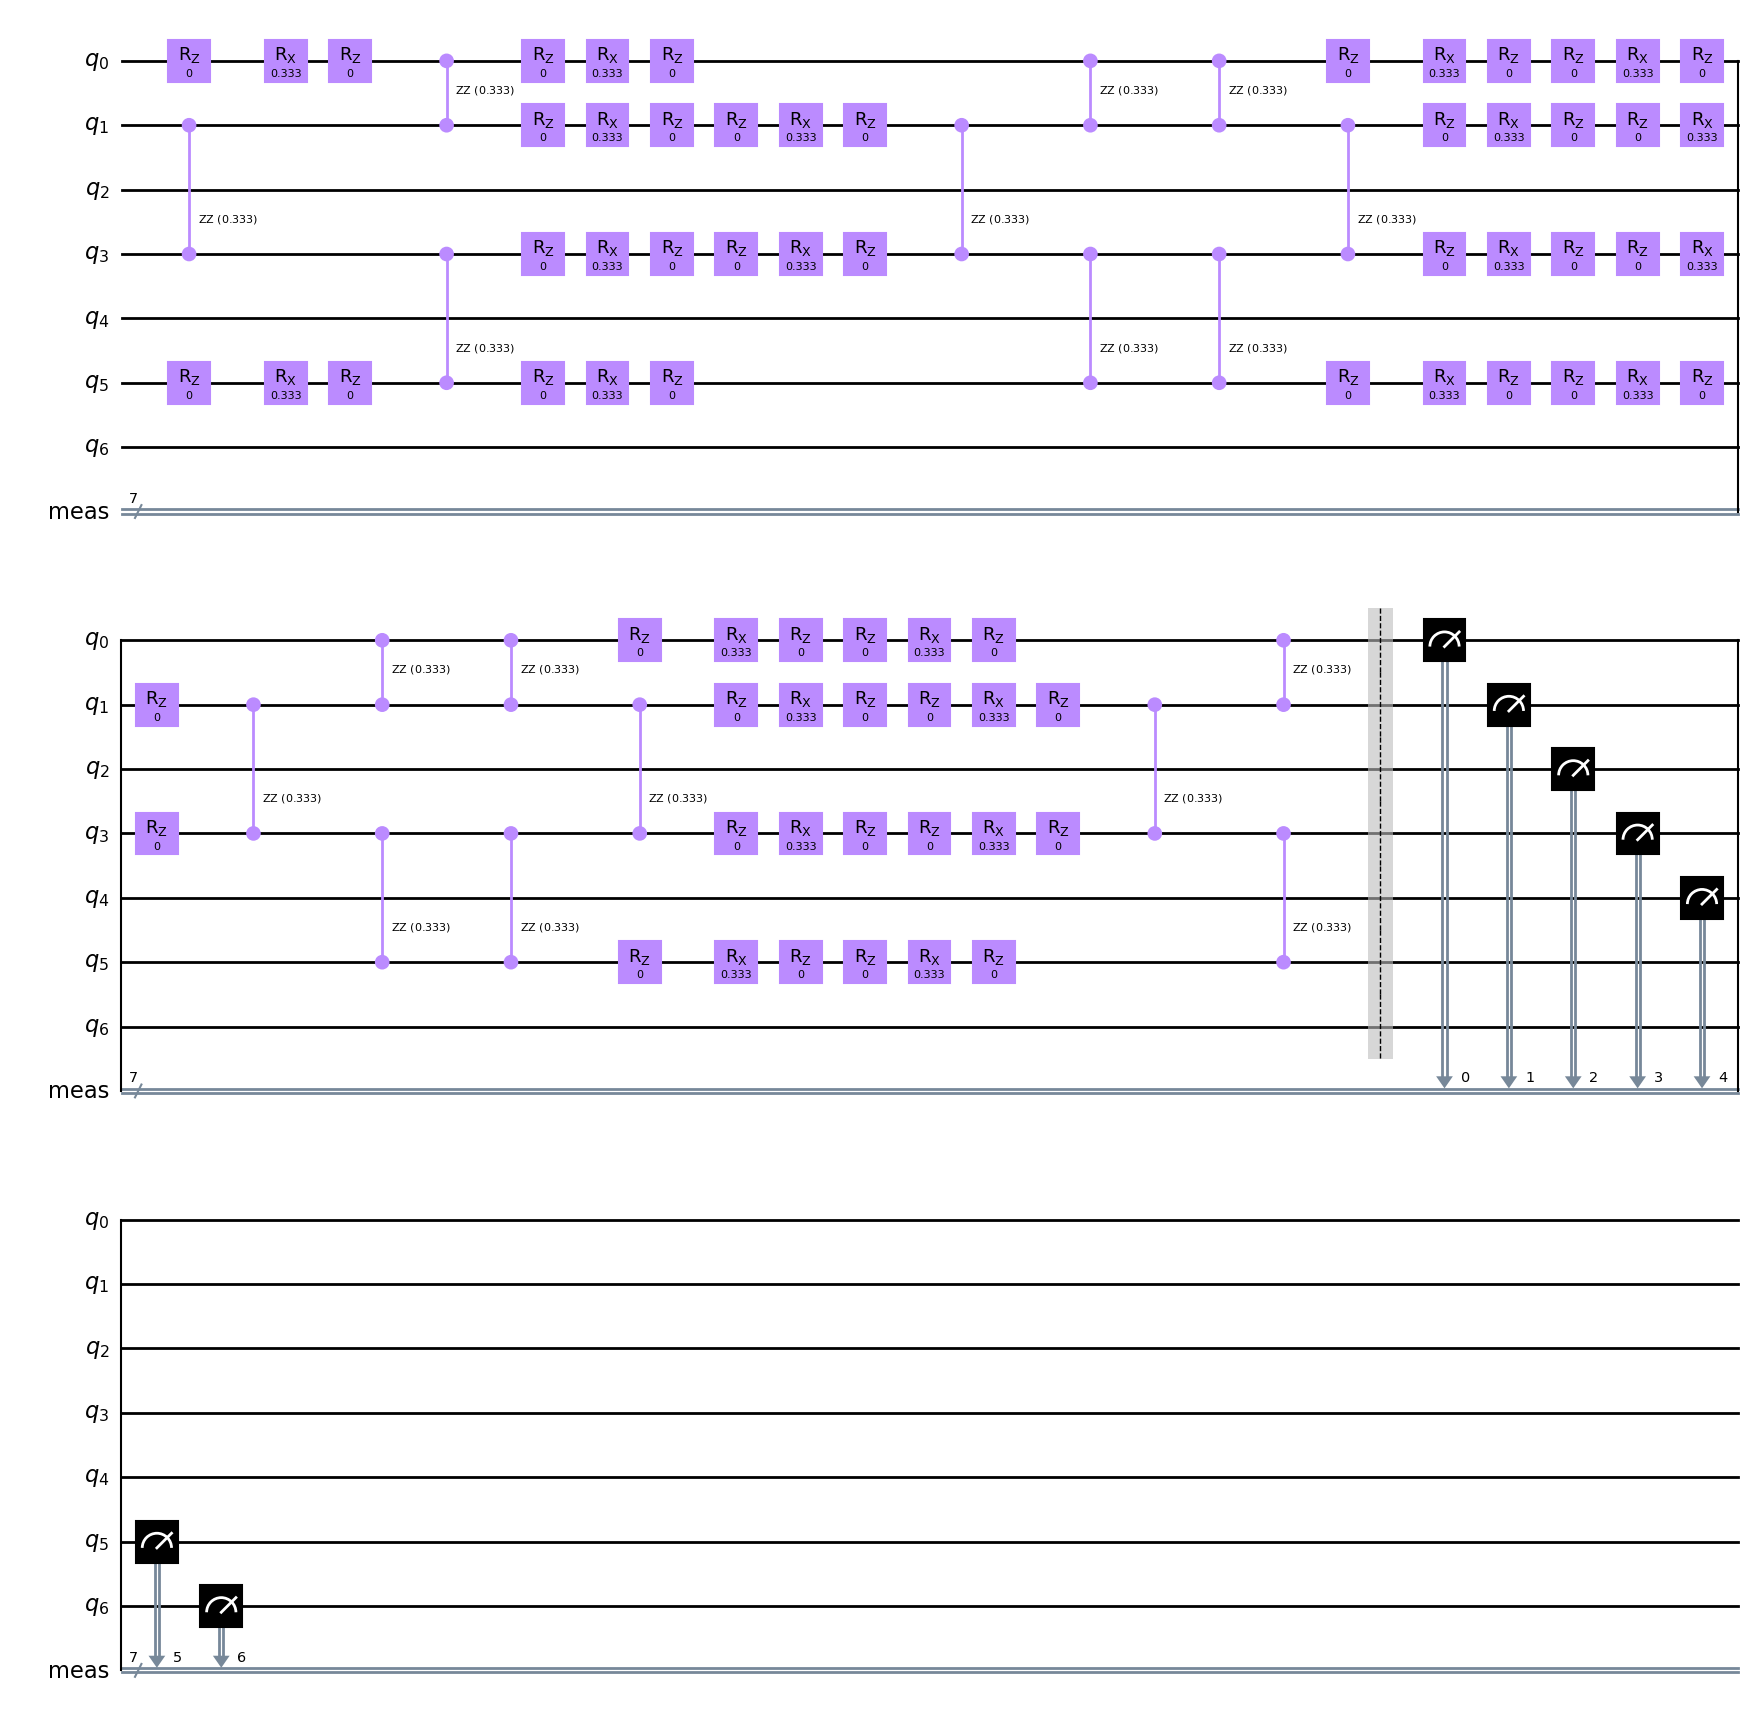

In [17]:
without_pm_prog.draw('mpl')

C:\Users\Admin\.conda\envs\thesis\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


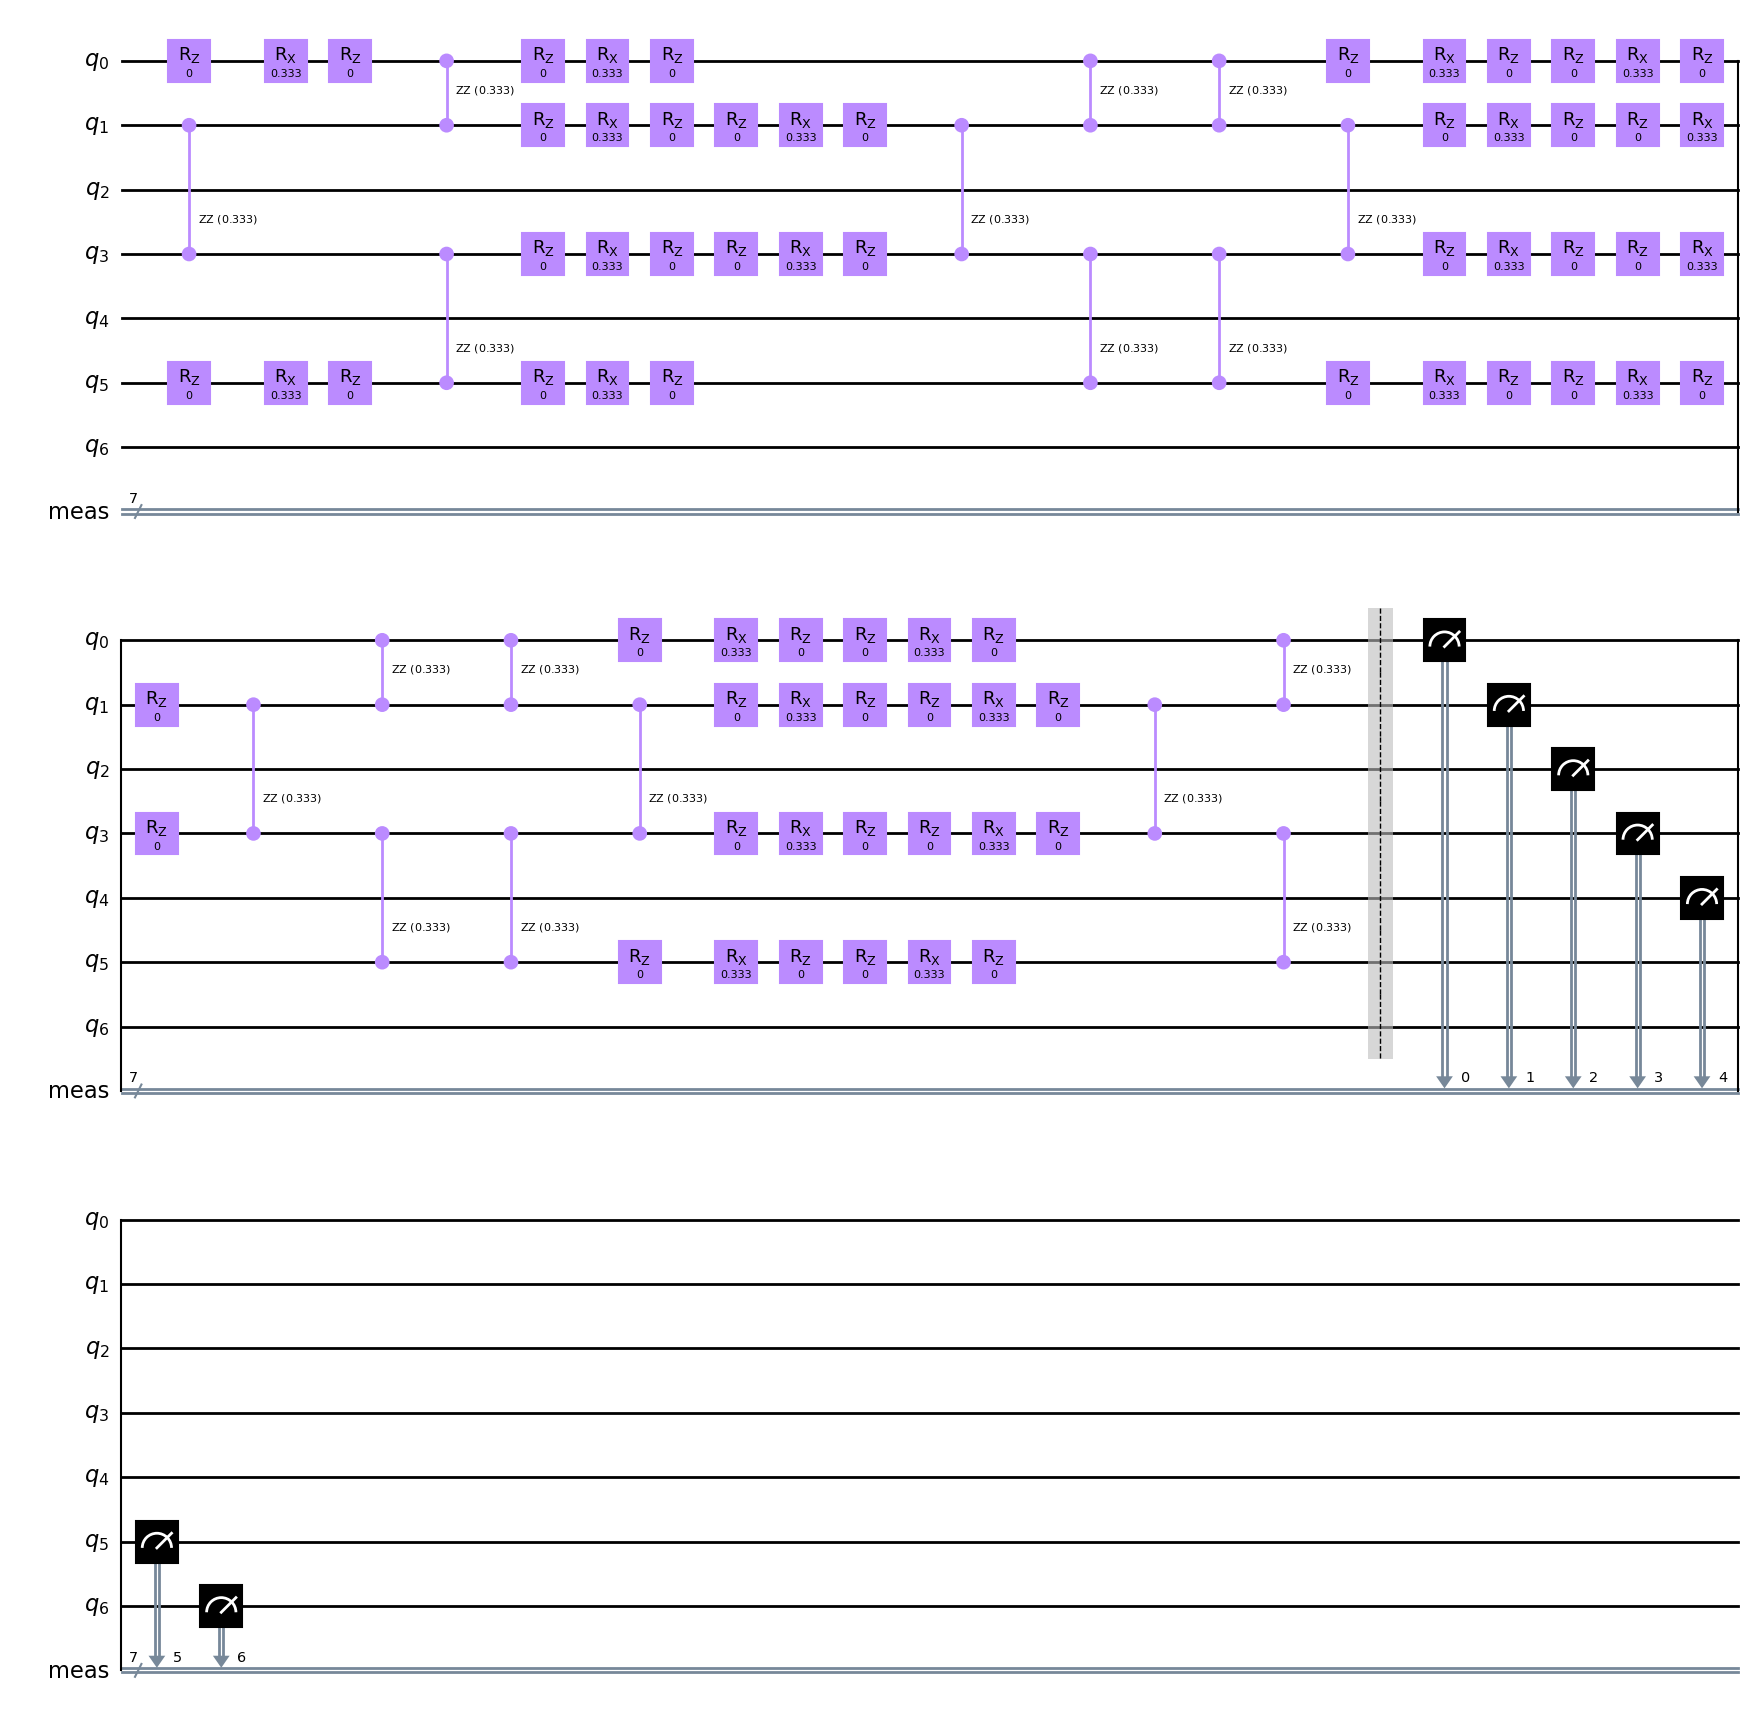

In [18]:
with_pm_prog.draw('mpl')